La intención es mostrar cómo actualmente los bancos están empezando a analizar quién es apto para un crédito y quién no.

Esto solo es un ejemplo muy sencillo, pero realmente empresas como Spotify, TikTok, BBVA, entre otras, utilizan este tipo de tecnología para conocer mejor a sus usuarios.

Importamos las librerias que usaremos 

In [65]:
import pandas as pd 
import torch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim


Leemos los datos 

In [66]:
datos=pd.read_csv(r"C:\Users\Usuario\Desktop\Data_sets\archive\train.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10012\2176152216.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  datos=pd.read_csv(r"C:\Users\Usuario\Desktop\Data_sets\archive\train.csv")


Tenemos la intención de crear un modelo de redes neuronales de tipo Fully Connected (FC) que nos permita determinar qué tan efectivo es otorgar un crédito a una persona y segmentarla en tres clases: "Poor", "Regular" y "Good", dependiendo de las siguientes variables

####### El conjunto de datos fue tomado de https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

## Significado de las variables

1. **ID**:  
   **Significado**: Identificador único del cliente.  
   **Descripción**: Número de identificación del cliente en el sistema.

2. **Customer_ID**:  
   **Significado**: ID del cliente.  
   **Descripción**: Es un identificador único para cada cliente en la base de datos.

3. **Month**:  
   **Significado**: Mes.  
   **Descripción**: El mes en el que se registran los datos de comportamiento financiero del cliente.

4. **Name**:  
   **Significado**: Nombre.  
   **Descripción**: El nombre del cliente. (Posiblemente en este caso, es el número de filas con datos, ya que tiene el valor 9985).

5. **Age**:  
   **Significado**: Edad.  
   **Descripción**: La edad del cliente en años.

6. **SSN**:  
   **Significado**: Número de Seguro Social.  
   **Descripción**: Número único asignado a cada persona, utilizado para fines fiscales y de seguridad social (en algunos países, como los EE. UU.).

7. **Occupation**:  
   **Significado**: Ocupación.  
   **Descripción**: El trabajo o actividad profesional del cliente.

8. **Annual_Income**:  
   **Significado**: Ingreso Anual.  
   **Descripción**: El ingreso total anual del cliente.

9. **Monthly_Inhand_Salary**:  
   **Significado**: Salario mensual neto.  
   **Descripción**: El salario mensual neto que el cliente recibe después de deducciones.

10. **Num_Bank_Accounts**:  
    **Significado**: Número de cuentas bancarias.  
    **Descripción**: El número de cuentas bancarias que el cliente tiene registradas.

11. **Num_Credit_Card**:  
    **Significado**: Número de tarjetas de crédito.  
    **Descripción**: El número de tarjetas de crédito que posee el cliente.

12. **Interest_Rate**:  
    **Significado**: Tasa de interés.  
    **Descripción**: La tasa de interés aplicada a los préstamos o productos financieros del cliente.

13. **Num_of_Loan**:  
    **Significado**: Número de préstamos.  
    **Descripción**: El número de préstamos que el cliente tiene o ha solicitado.

14. **Type_of_Loan**:  
    **Significado**: Tipo de préstamo.  
    **Descripción**: El tipo de préstamo que el cliente ha solicitado o tiene. (Este campo tiene un valor alto de valores faltantes).

15. **Delay_from_due_date**:  
    **Significado**: Retraso respecto a la fecha de vencimiento.  
    **Descripción**: Número de días de retraso en el pago respecto a la fecha de vencimiento de un pago.

16. **Num_of_Delayed_Payment**:  
    **Significado**: Número de pagos retrasados.  
    **Descripción**: El número total de pagos que el cliente ha retrasado en el pasado.

17. **Changed_Credit_Limit**:  
    **Significado**: Límite de crédito cambiado.  
    **Descripción**: Indica si el límite de crédito del cliente ha sido modificado.

18. **Num_Credit_Inquiries**:  
    **Significado**: Número de consultas de crédito.  
    **Descripción**: El número de veces que el cliente ha solicitado o tenido consultas de crédito en su historial.

19. **Credit_Mix**:  
    **Significado**: Mezcla de crédito.  
    **Descripción**: El tipo de productos de crédito que posee el cliente (tarjetas de crédito, préstamos, etc.).

20. **Outstanding_Debt**:  
    **Significado**: Deuda pendiente.  
    **Descripción**: La cantidad total de deuda que el cliente aún debe.

21. **Credit_Utilization_Ratio**:  
    **Significado**: Ratio de utilización de crédito.  
    **Descripción**: El porcentaje de crédito utilizado respecto al crédito disponible. Un valor alto indica que el cliente está utilizando una gran parte de su crédito disponible.

22. **Credit_History_Age**:  
    **Significado**: Edad del historial crediticio.  
    **Descripción**: El tiempo (en años) que el cliente ha tenido historial crediticio.

23. **Payment_of_Min_Amount**:  
    **Significado**: Pago del monto mínimo.  
    **Descripción**: Indica si el cliente ha pagado solo el monto mínimo de su deuda en lugar de pagar más.

24. **Total_EMI_per_month**:  
    **Significado**: EMI total por mes (Equated Monthly Installment).  
    **Descripción**: El monto total que el cliente paga cada mes como parte de sus préstamos, en cuotas fijas.

25. **Amount_invested_monthly**:  
    **Significado**: Monto invertido mensualmente.  
    **Descripción**: La cantidad de dinero que el cliente invierte cada mes en diversas actividades (como fondos de inversión, ahorro, etc.).

26. **Payment_Behaviour**:  
    **Significado**: Comportamiento de pago.  
    **Descripción**: Indica si el cliente tiene un buen comportamiento de pago, es decir, si paga a tiempo y sin retrasos.

27. **Monthly_Balance**:  
    **Significado**: Balance mensual.  
    **Descripción**: El saldo promedio o el balance mensual de la cuenta del cliente.

28. **Credit_Score**:  
    **Significado**: Puntaje de crédito.  
    **Descripción**: El puntaje que refleja la solvencia financiera del cliente, basado en su historial crediticio y comportamiento de pago.


Iniciamos explorando la descripción de nuestro dataset

In [67]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Aquí vamos a limpiar los datos lo mejor posible y usar las variables categóricas para poder usar vectores densos.

In [68]:
var_num=["Age", "Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date",
"Num_of_Delayed_Payment","Changed_Credit_Limit","Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly","Monthly_Balance"]


for i in var_num:
    datos[i] = datos[i].astype(str).str.replace("_", "").str.strip()
    datos[i] = datos[i].replace("", np.nan)
    datos[i] = round(pd.to_numeric(datos[i], errors='coerce'),2)

Haremos una limpieza de datos, enfocada en el cliente. Esa es la razón por la que estamos utilizando el Customer_ID.

Cuando de plano no tenemos informacion del cliente usaremos la mediana de la columna entera o el valor que más se repita en datos categóricos.

In [69]:
dicc_edad_id=datos.groupby("Customer_ID")["Age"].agg(lambda x: x.mode()[0]).to_dict()
dicc_job_id=datos.groupby("Customer_ID")["Occupation"].agg(lambda x: x.mode()[0]).to_dict()
dicc_loan_id=datos.groupby("Customer_ID")["Num_of_Loan"].agg(lambda x: x.mode()[0]).to_dict()
dicc_credi_mix_id=datos.groupby("Customer_ID")["Credit_Mix"].agg(lambda x: x.mode()[0]).to_dict()


datos["Age"] = datos["Customer_ID"].map(dicc_edad_id)
datos["Occupation"] = datos["Customer_ID"].map(dicc_job_id)
datos["Num_of_Loan"] = datos["Customer_ID"].map(dicc_loan_id)
datos["Credit_Mix"] = datos["Customer_ID"].map(dicc_credi_mix_id)


datos.loc[datos["Monthly_Inhand_Salary"].isna()==True,"Monthly_Inhand_Salary"]=datos.groupby(["Customer_ID"])["Monthly_Inhand_Salary"].transform("median")
datos.loc[datos["Num_of_Delayed_Payment"].isna()==True,"Num_of_Delayed_Payment"]=datos.groupby(["Customer_ID"])["Num_of_Delayed_Payment"].transform("median")
datos.loc[datos["Changed_Credit_Limit"].isna()==True,"Changed_Credit_Limit"]=datos.groupby(["Customer_ID"])["Changed_Credit_Limit"].transform("median")
datos.loc[datos["Num_Credit_Inquiries"].isna()==True,"Num_Credit_Inquiries"]=datos.groupby(["Customer_ID"])["Num_Credit_Inquiries"].transform("median")
datos.loc[datos["Amount_invested_monthly"].isna()==True,"Amount_invested_monthly"]=datos.groupby(["Customer_ID"])["Amount_invested_monthly"].transform("median")
datos.loc[datos["Monthly_Balance"].isna()==True,"Monthly_Balance"]=datos.groupby(["Customer_ID"])["Monthly_Balance"].transform("median")

datos.loc[datos["Payment_Behaviour"]=="!@9#%8","Payment_Behaviour"]=datos["Payment_Behaviour"].mode()[0]
datos.loc[datos["Occupation"]=="_______","Occupation"]=datos["Occupation"].mode()[0]
datos.loc[datos["Credit_Mix"]=="_","Credit_Mix"]=datos["Credit_Mix"].mode()[0]


datos["Type_of_Loan"]=datos["Type_of_Loan"].fillna("None")


datos["Payment_Behaviour"]=datos["Payment_Behaviour"].str.strip()
datos["Type_of_Loan"]=datos["Type_of_Loan"].str.strip()
datos["Occupation"]=datos["Occupation"].str.strip()


datos=datos.drop(columns=["ID","Customer_ID","Month","Name","SSN","Credit_History_Age"], axis=1)

Haremos una prueba estadística para ver qué tanta correlación tienen los datos numéricos. Siempre teniendo en cuenta que correlación no significa causalidad.

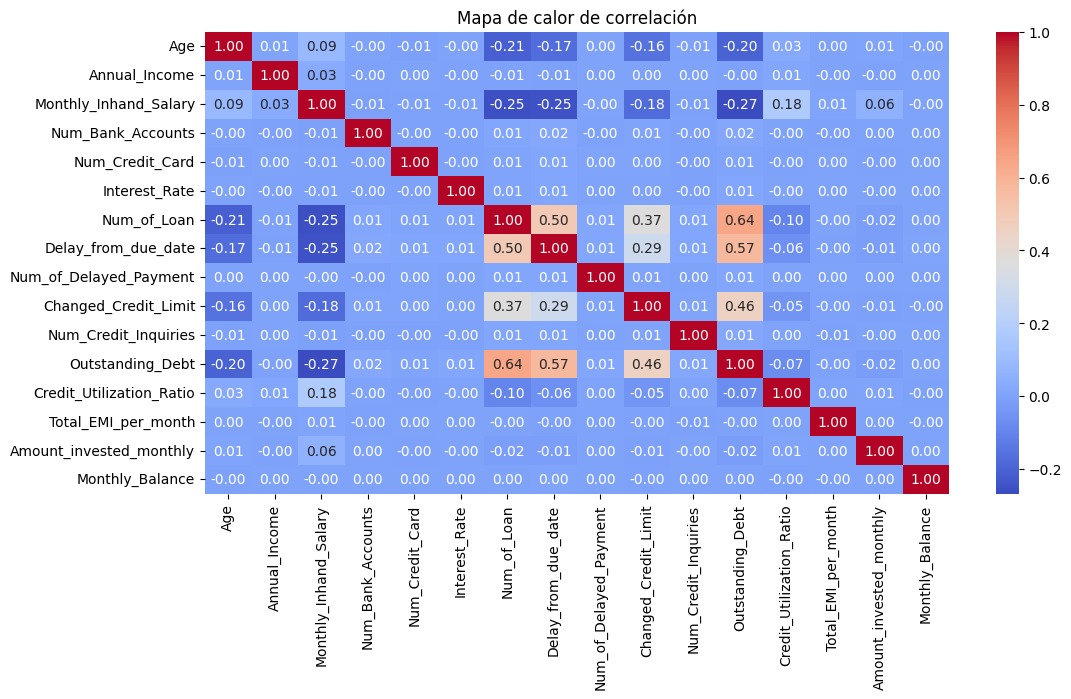

In [70]:
num_datos = datos.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(num_datos.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Escalaremos los datos numéricos para que tengan la misma escala y, por su dimensión natural, no aporten información errónea.

Un ejemplo sencillo de esto es que no es lo mismo comparar 10,000 (ingreso anual) y 5 (número de cuentas de banco).

In [71]:
scaler = StandardScaler()
numeric_columns = datos.select_dtypes(include=[np.number]).columns
datos[numeric_columns] = scaler.fit_transform(datos[numeric_columns])


Aquí codificaremos la variable objetivo, pero también las otras variables categóricas, esto con la intención de poder usar vectores densos en la arquitectura de la red.

In [72]:
Encoder = LabelEncoder()

Y=datos["Credit_Score"]
Y=Y.str.replace("Good","0")
Y=Y.str.replace("Standard","1")
Y=Y.str.replace("Poor","2")

Y=Y.astype(int)

X=datos.drop(columns="Credit_Score",axis=1)

le=Encoder.fit(np.array(X[['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']]).flatten())



X[['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = X[['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']].apply(le.fit_transform).astype(int)

Separamos el conjunto de datos en 3 partes: para entrenar, para validar y para hacer una evaluación final.

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [74]:
len(X_train),len(X_test),len(X_val)

(80000, 16000, 4000)

In [75]:
#### No veo necesario hacer un balanceo de clases

Veamos cómo se distribuyen los datos para saber si debemos o no balancearlos. En este caso, no es necesario.

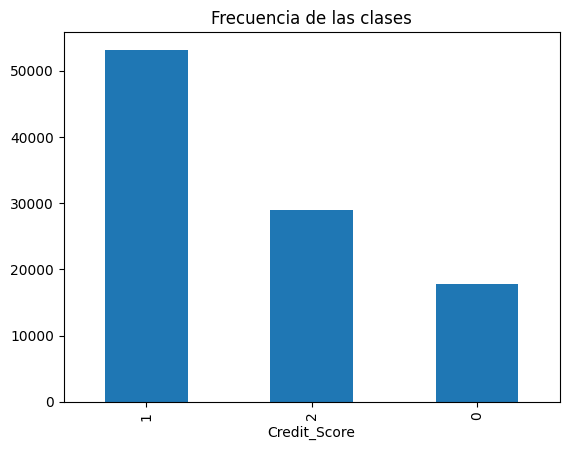

In [76]:
Y.value_counts().plot.bar()
plt.title("Frecuencia de las clases")
plt.show()

Ahora debemos establecer cómo será nuestro dataloader y cómo los datos entrarán en la red neuronal, tomando en cuenta que será una FC.

In [77]:
from torch.utils.data import Dataset, DataLoader

categoticas=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
numericas=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

X_categ=X[categoticas]
X_numeric=X[numericas]

X_train_categ=np.array(X_train[categoticas])
X_train_numerc=np.array(X_train[numericas])
Y_train=np.array(y_train)

X_test_categ=np.array(X_test[categoticas])
X_test_numerc=np.array(X_test[numericas])
Y_test=np.array(y_test)

#### torch es famosos por permitir unsar tensores, un vector con chocos en pocas palabras


class CreditScoreDataset(Dataset):
    def __init__(self, X_categ, X_numeric, Y):

                                                              ###Inicializa el dataset con las características categóricas, numéricas y las etiquetas.
        self.X_categ = torch.tensor(X_categ).to(torch.int64)  # Datos categóricos como índices para embeddings
        self.X_numeric = torch.tensor(X_numeric).float()      # Datos numéricos como flotantes
        self.Y = torch.tensor(Y).long()                       # Etiquetas de tipo long (enteros)

    def __len__(self):                                        ##Retorna el tamaño del dataset
        return len(self.X_categ)

    def __getitem__(self, idx):                               ## Retorna un par de datos categóricos, datos numéricos y la etiqueta correspondiente.
        return self.X_categ[idx], self.X_numeric[idx], self.Y[idx]

train_dataset = CreditScoreDataset(X_train_categ, X_train_numerc, Y_train)
test_dataset = CreditScoreDataset(X_test_categ, X_test_numerc, Y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=264, shuffle=False)

Aquí vamos a definir la arquitectura, utilizando todo el poder de los vectores densos para los datos categóricos.

In [78]:


class FCModelo(nn.Module):
    def __init__(self, num_catego, embedding_dim, numerical_input_size, output_size=3):
        super(FCModelo, self).__init__()

        self.embeddings = nn.ModuleList([
            nn.Embedding(num_catego[i], embedding_dim) for i in range(len(num_catego))      ### Nos vamos por cada valor unico de las columnas 
        ])
        self.fc_input_size = embedding_dim * len(num_catego) + numerical_input_size      ### La dimension de entrada a las capas 
        
        self.fc1 = nn.Linear(self.fc_input_size, 64)
        self.fc2 = nn.Linear(64,128)                                                       ## Aqui se puede agregar drop para evitar el sobreajuste o un batchnorma, optamos por dejar una arquitectura sencilla
        self.fc3 = nn.Linear(128, output_size)

    def forward(self, categorical_data, numerical_data):
        embedded = [self.embeddings[i](categorical_data[:, i]) for i in range(len(self.embeddings))]
        
        embedded = torch.cat(embedded, dim=1)
    
        x = torch.cat([embedded, numerical_data], dim=1)   ### Pegamos los datos categoricos y los datos numericos para que pasen por FC
         
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

num_catego = [len(np.unique(X_train[col])) for col in ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']]
embedding_dim = 8 



In [83]:
###3 este es el fit que uso para los modelos que hago ,realmente me es muy como y dependiendo de la arquitectura se le cambian algunas cosas
def fit(model, train_dataloader, test_dataloader, optimizer, scheduler=None, epochs=100, log_each=1, weight_decay=0, l1_lambda=0.0, early_stopping=3, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()  # No se necesita softmax explícito
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs + 1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        
        model.train()
        for x_cat, x_num, y_b in tqdm(train_dataloader, desc=f'Epoch {e}/{epochs} - Entrenando', leave=False):
            y_pred = model(x_cat, x_num)
            loss = criterion(y_pred, y_b)
            
            # Aplicar penalización L1
            if l1_lambda > 0:
                l1_loss = 0
                for param in model.parameters():
                    l1_loss += l1_penalty(param)
                loss += l1_lambda * l1_loss

            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(y_pred, axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_cat, x_num, y_b in test_dataloader:
                y_pred = model(x_cat, x_num)
                loss = criterion(y_pred, y_b)

                if l1_lambda > 0:
                    l1_loss = 0
                    for param in model.parameters():
                        l1_loss += l1_penalty(param)
                    loss += l1_lambda * l1_loss

                _l.append(loss.item())
                y_probas = torch.argmax(y_pred, axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        
        step += 1

        if scheduler:
            scheduler.step()

        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        if not e % log_each and verbose:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f} ")

    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l) + 1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

Aquí entrenaremos la red, lo cual nos regresará métricas para ir monitoreando el entrenamiento.

In [84]:
model = FCModel(num_categories=num_categories, embedding_dim=embedding_dim, numerical_input_size=X_train_numerc.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.0001)    ### Tomemos en cuenta que no estamos buscando hiperparametros tanto el lr como en batch size 
                                                        ### Y estamos entrenando muy simplemente sin metodos de super convergencia ni ningun schedeluder
criterion = nn.CrossEntropyLoss()                        ### Usamos Croos entropy para clasificacion multiclase 

train=fit(model,train_dataloader,test_dataloader,optimizer)

Epoch 1/100 loss 0.82288 acc 0.59396 val_loss 0.75931 val_acc 0.64440 lr 0.00010 


Epoch 2/100 loss 0.74224 acc 0.65458 val_loss 0.74009 val_acc 0.66280 lr 0.00010 


Epoch 3/100 loss 0.72905 acc 0.66505 val_loss 0.73434 val_acc 0.66831 lr 0.00010 


Epoch 4/100 loss 0.72358 acc 0.66956 val_loss 0.73174 val_acc 0.67100 lr 0.00010 


Epoch 5/100 loss 0.71989 acc 0.67207 val_loss 0.72878 val_acc 0.67438 lr 0.00010 


Epoch 6/100 loss 0.71626 acc 0.67469 val_loss 0.72734 val_acc 0.67194 lr 0.00010 


Epoch 7/100 loss 0.71311 acc 0.67760 val_loss 0.72627 val_acc 0.67388 lr 0.00010 


Epoch 8/100 loss 0.71039 acc 0.67816 val_loss 0.72302 val_acc 0.67543 lr 0.00010 


Epoch 9/100 loss 0.70757 acc 0.68179 val_loss 0.72269 val_acc 0.67581 lr 0.00010 


Epoch 10/100 loss 0.70537 acc 0.68249 val_loss 0.72066 val_acc 0.67748 lr 0.00010 


Epoch 11/100 loss 0.70302 acc 0.68478 val_loss 0.72035 val_acc 0.67846 lr 0.00010 


Epoch 12/100 loss 0.70079 acc 0.68510 val_loss 0.71828 val_acc 0.67862 lr 0.00010 


Epoch 13/100 loss 0.69857 acc 0.68731 val_loss 0.71891 val_acc 0.67752 lr 0.00010 


Epoch 14/100 loss 0.69631 acc 0.68764 val_loss 0.71671 val_acc 0.67839 lr 0.00010 


Epoch 15/100 loss 0.69429 acc 0.68900 val_loss 0.71642 val_acc 0.67972 lr 0.00010 


Epoch 16/100 loss 0.69198 acc 0.69059 val_loss 0.71375 val_acc 0.68232 lr 0.00010 


Epoch 17/100 loss 0.68975 acc 0.69199 val_loss 0.71336 val_acc 0.68348 lr 0.00010 


Epoch 18/100 loss 0.68747 acc 0.69331 val_loss 0.71126 val_acc 0.68278 lr 0.00010 


Epoch 19/100 loss 0.68508 acc 0.69549 val_loss 0.71104 val_acc 0.68460 lr 0.00010 


Epoch 20/100 loss 0.68263 acc 0.69703 val_loss 0.71016 val_acc 0.68526 lr 0.00010 


Epoch 21/100 loss 0.68041 acc 0.69900 val_loss 0.70795 val_acc 0.68566 lr 0.00010 


Epoch 22/100 loss 0.67806 acc 0.70021 val_loss 0.70709 val_acc 0.68760 lr 0.00010 


Epoch 23/100 loss 0.67557 acc 0.70226 val_loss 0.70686 val_acc 0.68754 lr 0.00010 


Epoch 24/100 loss 0.67296 acc 0.70274 val_loss 0.70467 val_acc 0.68967 lr 0.00010 


Epoch 25/100 loss 0.67060 acc 0.70470 val_loss 0.70360 val_acc 0.69068 lr 0.00010 


Epoch 26/100 loss 0.66804 acc 0.70705 val_loss 0.70247 val_acc 0.69356 lr 0.00010 


Epoch 27/100 loss 0.66542 acc 0.70734 val_loss 0.70217 val_acc 0.69118 lr 0.00010 


Epoch 28/100 loss 0.66264 acc 0.70989 val_loss 0.69947 val_acc 0.69523 lr 0.00010 


Epoch 29/100 loss 0.66011 acc 0.71057 val_loss 0.69876 val_acc 0.69420 lr 0.00010 


Epoch 30/100 loss 0.65741 acc 0.71276 val_loss 0.69709 val_acc 0.69430 lr 0.00010 


Epoch 31/100 loss 0.65492 acc 0.71444 val_loss 0.69711 val_acc 0.69859 lr 0.00010 


Epoch 32/100 loss 0.65227 acc 0.71635 val_loss 0.69395 val_acc 0.69581 lr 0.00010 


Epoch 33/100 loss 0.64936 acc 0.71749 val_loss 0.69291 val_acc 0.69797 lr 0.00010 


Entrenamiento detenido en epoch 34 por no mejorar en 3 epochs seguidas


Aquí podemos ver cómo, a lo largo de las épocas, va mejorando el rendimiento. Siempre hay que considerar estas gráficas, pues nos ayudan a saber si nuestro modelo presenta signos de sobreajuste. Igualmente, hay muchas métricas que, dependiendo de nuestro caso, nos darán una idea, siempre considerando nuestro problema y si los datos son desbalanceados o no. Aquí nos vamos a centrar en accuracy y loss.

Podemos ver que hay un pequeño sobreajuste al momento de ver cómo el training_loss se separa del validation_loss, pero no es alarmante ese sobreajuste.

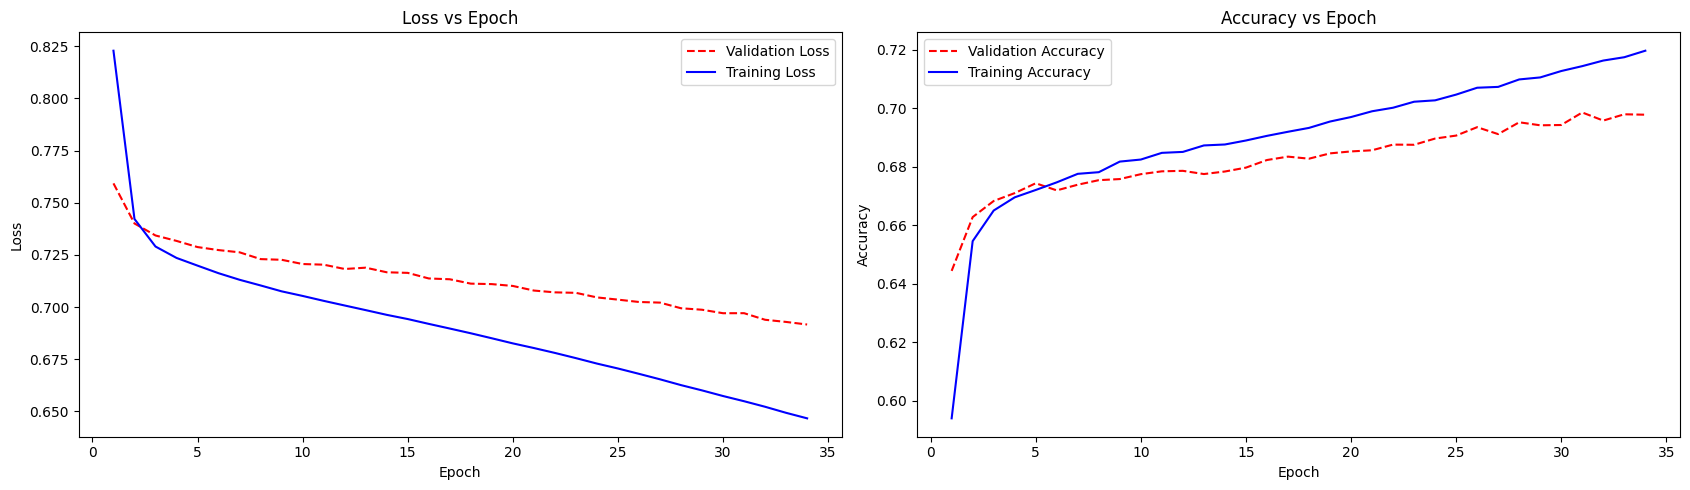

In [85]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

ax1.plot(train["epoch"], train["val_loss"], label="Validation Loss", color='red', linestyle='--')
ax1.plot(train["epoch"], train["loss"], label="Training Loss", color='blue', linestyle='-')
ax1.set_title("Loss vs Epoch")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(train["epoch"], train["val_acc"], label="Validation Accuracy", color='red', linestyle='--')
ax2.plot(train["epoch"], train["acc"], label="Training Accuracy", color='blue', linestyle='-')
ax2.set_title("Accuracy vs Epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()



Evaluamos con los datos que destinamos para ello y podemos ver que el modelo tiene muy buen rendimiento.

Ejemplo de cómo leer la matriz de confusión: de la etiqueta 0, se clasificaron correctamente 456 datos.

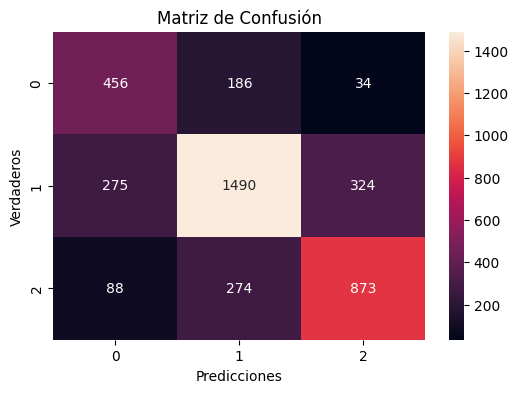

In [86]:
X_val_categ = np.array(X_val[categoticas])
X_val_categ = torch.tensor(X_val_categ).to(torch.int64)

X_val_numeric = np.array(X_val[numericas])
X_val_numeric = torch.tensor(X_val_numeric).float()

Y_val = np.array(y_val)
model.eval()

with torch.no_grad():
    y_probas = model(X_val_categ, X_val_numeric)
    y_pred = torch.argmax(y_probas, axis=1)
    cm = confusion_matrix(Y_val, y_pred.numpy())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cbar=True)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()





Sin duda, existen modelos de ML ya cargados que darían mejores resultados, pero también hemos omitido el hecho de buscar los hiperparámetros que hagan que el modelo sea mejor, porque ya me estaba dando hambre jajaj. Eso, sin duda, hace que las redes neuronales aumenten muchísimo su desempeño.

Ya, cuando el modelo cumple tus especificaciones, es momento de mandarlo a producción, pero eso luego se los muestro, porque aún sigo trabajando (me he hecho wey) en levantar el A.P.I. y el backend.

Y también es caro usar servidores en la nube, no crean que es regalado. Por eso he estado usando el correo institucional de Andrea :). camara, se la lavan.